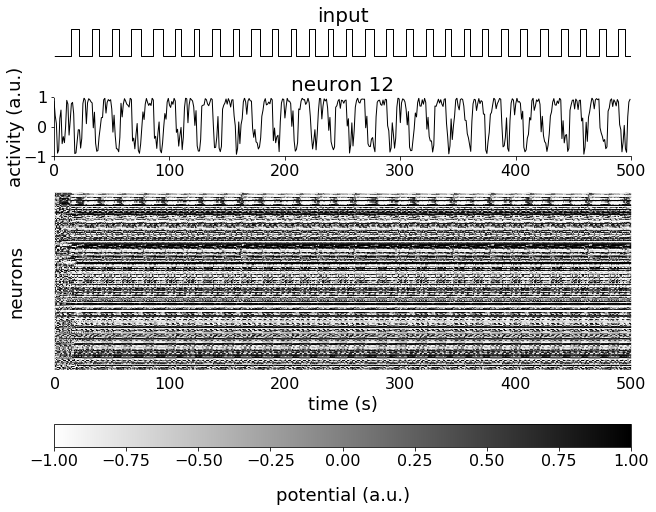

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

inputPulses = np.genfromtxt(open("fig4_Input.csv", "rb"), delimiter=",")
out = np.genfromtxt(open("fig4_NeuronDynamics.csv", "rb"), delimiter=",")

fSize = 18; labelPos = -0.05

def plot(X,inputt):
    time = len(inputt)
    neuron_chosen = 12

    tvec = np.arange(0,time)
    newTime = [tvec[0]]
    newInput = [inputPulses[0]]
    for i in range(1, len(inputPulses) - 1):
        newInput.append(inputPulses[i])
        newTime.append(tvec[i])
        if (inputPulses[i] == 0 and inputPulses[i + 1] == 1):
            newInput.append(0)
            newTime.append(tvec[i+1])
        elif (inputPulses[i] == 1 and inputPulses[i + 1] == 0):
            newInput.append(0)
            newTime.append(tvec[i])

    newInput.append(inputPulses[-1])
    newTime.append(tvec[-1])

    fig = plt.figure(figsize=(9,7),constrained_layout=True) # 2 cols(18,12)
    gs = fig.add_gridspec(9, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[1:3, 0])
    ax3 = fig.add_subplot(gs[3:, 0])

    fig.patch.set_facecolor('xkcd:white')

    ax1.set_xlim(0,time)
    ax1.set_title('input',color='black',fontsize=fSize+2)
    ax1.set_facecolor('xkcd:white')
    ax1.tick_params(axis=('x'), colors='white')
    ax1.tick_params(axis=('y'), colors='white')
    ax1.set_yticklabels([])
    ax1.set_xticklabels([])

    for spine in ax1.spines.values():
        spine.set_edgecolor('white')

    ax1.plot(newTime,newInput,color='black',linewidth=1)
    #lg = plt.legend(fontsize=18)

    ax2.set_xlim(0,time)
    ax2.set_title('neuron '+str(neuron_chosen),color='black',fontsize=fSize+2)
    ax2.set_facecolor('xkcd:white')
    ax2.tick_params(axis=('x'), colors='black')
    ax2.tick_params(axis=('y'), colors='black')
    ax2.plot(np.reshape(np.arange(0,time),(time,1)),np.transpose(X[neuron_chosen,:-1]),color='black',linewidth=1)
    ax2.xaxis.label.set_color('black')
    ax2.tick_params(labelsize=fSize-2)
    ax2.set_ylim(-1,1)
    ax2.get_yaxis().set_label_coords(labelPos,0.5)

    ax2.spines['top'].set_color('white'); ax2.spines['right'].set_color('white')
    ax2.set_ylabel('activity (a.u.)',fontsize=fSize)

    im = ax3.imshow(X,cmap='gist_yarg',aspect='auto',norm=mpl.colors.Normalize(vmin=-1, vmax=1))
    
    color_bar = plt.colorbar(im,orientation='horizontal',drawedges=False)
    color_bar.ax.tick_params(labelsize=fSize-2,color='black')
    color_bar.ax.set_xlabel('potential (a.u.)',fontsize=fSize,labelpad=18)
    #cbytick_obj = plt.getp(color_bar.ax.axes, 'xticklabels')
    #plt.setp(cbytick_obj, color='black')
    ax3.set_yticklabels([])
    ax3.set_facecolor('xkcd:white')
    ax3.tick_params(axis=('x'), colors='black')
    ax3.tick_params(axis=('y'), colors='black')
    ax3.xaxis.label.set_color('black')
    ax3.yaxis.label.set_color('black')
    ax3.tick_params(color='white',labelsize=fSize-2)
    ax3.set_ylabel('neurons',fontsize=fSize)
    ax3.set_xlabel('time (s)',fontsize=fSize)
    ax3.get_yaxis().set_label_coords(labelPos,0.5)



    for spine in ax3.spines.values():
        spine.set_edgecolor('white')
        
    return fig

fig = plot(out,inputPulses)
plt.show()

fig.savefig('fig4.pdf')